# Assignment for "Programming in Data Analysis" module
## Autumn 2021

## An overview of numpy.random 

![NumPy_logo](Images/NumPy_logo.png)

What is NumPy

"NumPy ... is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays."
https://en.wikipedia.org/wiki/NumPy

"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more."
https://numpy.org/doc/stable/user/whatisnumpy.html

The random simulation is the focus of this project.

Although Python already has a random module, numpy.random adds much extra functionality in particular in relation to arrays and has the ability to draw from a lot more statistical distributions.

https://realpython.com/python-random/#prngs-for-arrays-numpyrandom

https://www.w3schools.com/python/numpy/numpy_random.asp

link to documentation - https://numpy.org/doc/stable/reference/random/index.html

## An Explanation of the “Simple random data” and “Permutations” functions

Link to documentation - https://numpy.org/doc/1.16/reference/routines.random.html <br>
Might be old! <br>
new stuff here - https://numpy.org/doc/stable/reference/random/index.html?highlight=random%20sampling%20numpy%20random#module-numpy.random

### Simple Random Data

- rand - Random values in a given shape.
- randn - Return a sample (or samples) from the “standard normal” distribution.
- randint - Return random integers from low (inclusive) to high (exclusive).
- random_integers - Random integers of type np.int between low and high, inclusive.
- random_sample - Return random floats in the half-open interval [0.0, 1.0).
- random - Return random floats in the half-open interval [0.0, 1.0).
- ranf - Return random floats in the half-open interval [0.0, 1.0).
- sample - Return random floats in the half-open interval [0.0, 1.0).
- choice - Generates a random sample from a given 1-D array
- bytes - Return random bytes

### Permutations

- shuffle - Modify a sequence in-place by shuffling its contents
- permutation - Randomly permute a sequence, or return a permuted range

## The use of seeds in generating pseudorandom numbers

In [4]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Creating a default figure size
plt.rcParams['figure.figsize']=[12,8]

In [6]:
# create a random number generator
rng = np.random.default_rng()
rng

Generator(PCG64) at 0x7F926F036040

### Generating random integers

##### 1d array of random integers

In [7]:
# the first parameter (3) is the range (non-inclusive), i.e. 0, 1 and 2
# size is no. of numbers returned
rng.integers(3, size=10)

array([2, 1, 0, 0, 0, 1, 1, 2, 1, 0])

##### 2d array of random integers

In [8]:
# 1st paremeter is the range max (non-inclusive)
# size is rows then columns
rng.integers(5, size=(3,4))

array([[1, 1, 4, 2],
       [2, 3, 3, 3],
       [1, 1, 3, 2]])

##### multi-dimensional array of random integers

In [10]:
# again range of 5
# 5 groups of 4 arrays, each with 3 rows and 2 columns
rng.integers(5, size=(5,4,3,2))

array([[[[4, 2],
         [4, 4],
         [4, 1]],

        [[4, 1],
         [0, 3],
         [2, 1]],

        [[4, 3],
         [2, 4],
         [2, 2]],

        [[4, 1],
         [0, 4],
         [4, 4]]],


       [[[0, 1],
         [4, 3],
         [1, 0]],

        [[4, 0],
         [3, 0],
         [4, 0]],

        [[4, 2],
         [2, 2],
         [3, 0]],

        [[4, 0],
         [3, 4],
         [0, 1]]],


       [[[2, 4],
         [4, 0],
         [1, 3]],

        [[2, 2],
         [1, 0],
         [0, 1]],

        [[1, 4],
         [4, 3],
         [0, 0]],

        [[3, 2],
         [0, 0],
         [0, 1]]],


       [[[2, 0],
         [1, 1],
         [4, 1]],

        [[0, 3],
         [0, 1],
         [2, 4]],

        [[1, 4],
         [3, 0],
         [0, 2]],

        [[4, 0],
         [0, 1],
         [0, 4]]],


       [[[3, 0],
         [0, 1],
         [2, 3]],

        [[2, 0],
         [4, 4],
         [3, 1]],

        [[3, 1],
         [4, 1],
    

### Visualisation

The higher the size of numbers generated,the more uniforim the distribution

In [19]:
# looking at the difference the 'size' makes
x = rng.integers(100, size = 10)
y = rng.integers(100, size = 100)
z = rng.integers(100, size = 1000)
a = rng.integers(100, size = 10000)
b = rng.integers(100, size = 100000)
c = rng.integers(100, size = 1000000)

We can see this more clearly on a subplot of histograms

(array([100140.,  99943., 100508., 100279.,  99718., 100047., 100022.,
         99771.,  99448., 100124.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

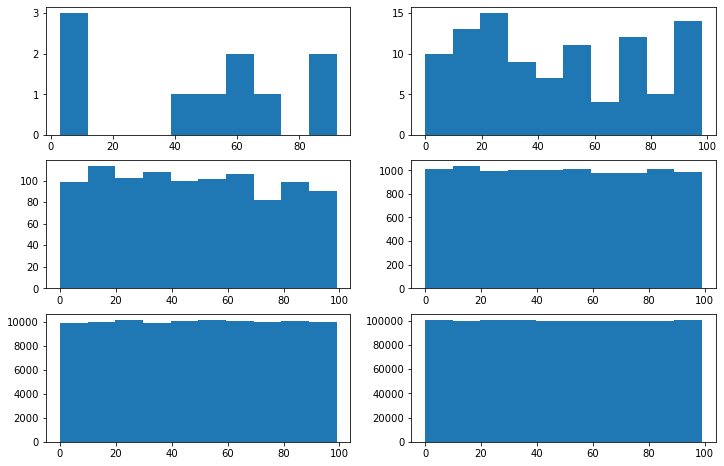

In [21]:
# plt.subplots(3,2) creates 3 rows and 2 columns of plots
# axs[0,0] etc. specifies where this plot goes in the arrangement
fig, axs = plt.subplots(3,2)
axs[0,0].hist(x)
axs[0,1].hist(y)
axs[1,0].hist(z)
axs[1,1].hist(a)
axs[2,0].hist(b)
axs[2,1].hist(c)

This is known as uniform distribution

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

Another example below, this time specifying a lower minus value. As above if no lower value is set then zero is the default.

In [26]:
# range is -1 to 0, and we're getting 1000 numbers
np.random.uniform(-1,0,1000)
# every number is equally likely to be returned

array([-3.55527608e-01, -4.46954073e-01, -7.00995732e-01, -3.08908515e-01,
       -9.98744878e-01, -1.60703509e-01, -4.42788360e-01, -1.91168499e-01,
       -3.14690933e-01, -4.91592334e-01, -9.73588162e-02, -4.38789829e-01,
       -9.17903846e-01, -6.41060377e-01, -4.92104247e-01, -2.30594828e-01,
       -5.36690166e-02, -5.33505097e-01, -8.71862806e-01, -3.47245813e-01,
       -1.03493592e-01, -6.06620930e-01, -7.38174849e-01, -4.80884421e-02,
       -2.98177869e-01, -5.55990412e-01, -7.40657887e-01, -1.49488800e-01,
       -3.22656731e-01, -3.65072948e-01, -2.13322249e-01, -6.26660298e-01,
       -2.63050595e-02, -7.37292183e-01, -4.18996153e-01, -9.81765385e-01,
       -3.14648239e-01, -9.17144896e-01, -1.58679070e-01, -3.04548137e-01,
       -2.45306024e-01, -8.60829287e-01, -5.29276901e-02, -6.82548221e-01,
       -5.19470769e-01, -4.98967164e-01, -8.22623273e-01, -7.88703296e-01,
       -7.38421069e-01, -9.99480960e-04, -2.53092231e-01, -6.72155896e-01,
       -7.72956906e-01, -

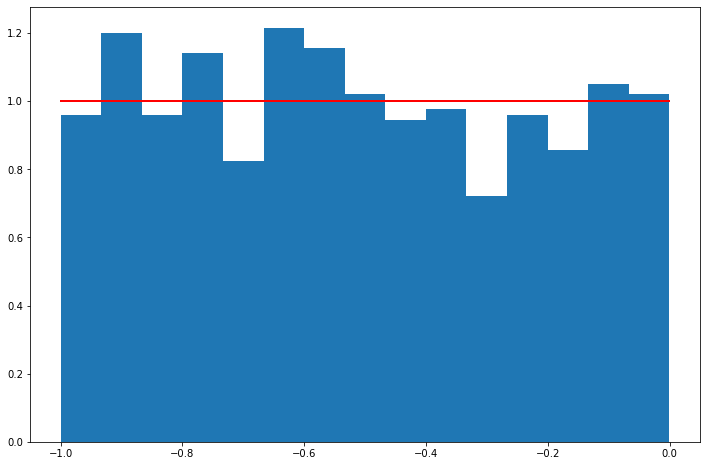

In [25]:
# visualise
y = np.random.uniform(-1,0,1000)
count, bins, ignored = plt.hist(y, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r') # include a red line to show the average
plt.show()

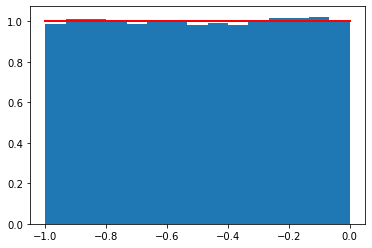

In [20]:
# the more times we run it the flatter the line at the top
x = np.random.uniform(-1,0,100000)

count, bins, ignored = plt.hist(x, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

## Normal distribution

Normal distribution represents the behavior of most of the situations in the universe (That is why it’s called a “normal” distribution. I guess!). The large sum of (small) random variables often turns out to be normally distributed, contributing to its widespread application.

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

In [40]:
# (10,100,10000) 1st number is centre, 2nd is spread (*3), 3rd of amount of
# numbers returned
z=np.random.normal(10,100,10000)

(array([   3.,   52.,  343., 1220., 2428., 2953., 1965.,  797.,  207.,
          32.]),
 array([-390.73542376, -315.54004743, -240.34467109, -165.14929475,
         -89.95391842,  -14.75854208,   60.43683425,  135.63221059,
         210.82758692,  286.02296326,  361.21833959]),
 <BarContainer object of 10 artists>)

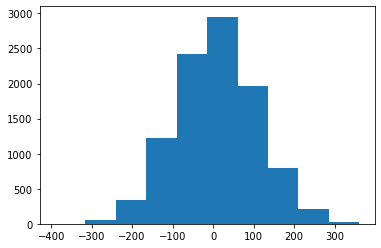

In [41]:
plt.hist(z)

## Binomial Distribution

Binomial distribution is when we're dealing with only 2 outcomes. These can be equal such as a coin toss as demomstrated below. Or if we know the probability of an outcome we can insert that as in the second example.

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

#### coin toss

In [4]:
>>> n, p = 10, .5  # n= number of trials, p = probability of each trial
>>> s = np.random.binomial(n, p, 1000)
# s = result of flipping a coin 10 times (either heads/tails), tested 1000 times.
s

array([ 3,  5,  4,  3,  6,  7,  6,  6,  4,  5,  3,  2,  5,  5,  6,  5,  2,
        2,  6,  7,  6,  2,  7,  6,  5,  6,  4,  9,  2,  6,  3,  4,  4,  5,
        6,  5,  4,  3,  5,  7,  2,  5,  5,  5,  4,  5,  4,  6,  7,  7,  6,
        7,  6,  4,  5,  5,  7,  7,  2,  6,  6,  3,  5,  5,  7,  3,  2,  5,
        4,  6,  3,  4,  7,  4,  5,  3,  5,  4,  3,  5,  6,  5,  5,  4,  5,
        7,  5,  4,  2,  4,  4,  6,  4,  7,  4,  5,  4,  7,  7,  4,  5,  6,
        4,  9,  7,  4,  6,  5,  4,  3,  4,  2,  4,  6,  5,  5,  5,  6,  5,
        4,  7,  4,  5,  4,  5,  6,  7,  7,  4,  4,  5,  6,  6,  5,  4,  6,
        7,  5,  4,  6,  2,  6,  5,  6,  2,  4,  6,  3,  6,  5,  4,  3,  4,
        4,  7,  4,  6,  6,  3,  6,  3,  4,  6,  7,  5,  3,  8, 10,  5,  6,
        5,  4,  6,  5,  5,  5,  5,  4,  8,  5,  6,  5,  6,  7,  6,  5,  3,
        2,  7,  6,  4,  4,  8,  5,  4,  2,  5,  7,  8,  4,  8,  5,  5,  5,
        4,  4,  3,  8,  3,  3,  8,  4,  4,  4,  3,  5,  7,  6,  4,  4,  6,
        3,  4,  5,  4,  6

(array([  7.,  47., 110., 206., 239., 206., 126.,  48.,   6.,   5.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

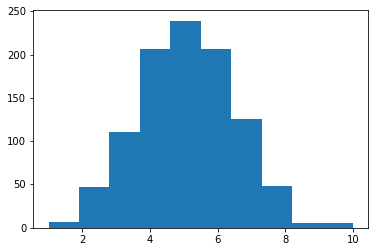

In [7]:
# Plotted
plt.hist(s)

A real world example. A company drills 9 wild-cat oil exploration wells, each with an estimated probability of success of 0.1. All nine wells fail. What is the probability of that happening?

Let’s do 20,000 trials of the model, and count the number that generate zero positive results.

In [8]:
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000.

0.38245

(array([7801.,    0., 7695.,    0., 3432.,    0.,  889.,    0.,  169.,
          14.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

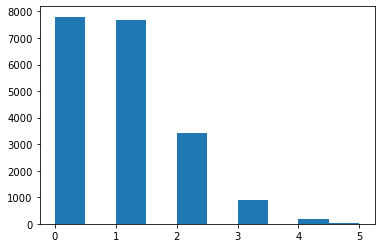

In [14]:
# to visualise that
a = np.random.binomial(9, 0.1, 20000)
plt.hist(a)

## Poisson Distribution

Not quite sure what this is about! :)

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson

(array([ 383.,  863., 3161., 1766., 2507.,  677.,  510.,   79.,   47.,
           7.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

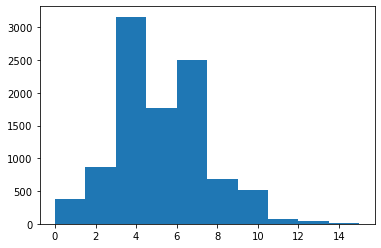

In [23]:
rng = np.random.default_rng()
s = rng.poisson(5, 10000)
plt.hist(s)

## Exponential Distribution

Link to documentation - https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

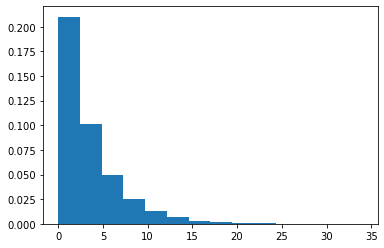

In [24]:
gfg = np.random.exponential(3.45, 10000)
  
count, bins, ignored = plt.hist(gfg, 14, density = True)
plt.show()

## The use of seeds in generating pseudorandom numbers

https://www.sharpsightlabs.com/blog/numpy-random-seed/

https://towardsdatascience.com/stop-using-numpy-random-seed-581a9972805f

# END